# Air BnB Listing Analysis
This project focused on analyzing Airbnb listings in Paris, focusing on pricing trends and the impact of 2015 regulations. The goal is to provide a visual summary of key factors affecting pricing and assess how regulatory changes have influenced market.

* Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* Importing data

In [2]:
data=pd.read_csv(r"C:\Users\Jeet Ghosh\Downloads\excel\Project\airbnb\Listings.csv", encoding='latin1')

C:\Users\Jeet Ghosh\AppData\Local\Temp\ipykernel_8904\3487128380.py:1: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"C:\Users\Jeet Ghosh\Downloads\excel\Project\airbnb\Listings.csv", encoding='latin1')


In [3]:
data.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,12/3/2011,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,11/29/2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,7/31/2014,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,12/17/2013,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,12/14/2014,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


# Taking only the Paris data and necessary columns for analysis as per the requirements

In [4]:
required_data=data[data["city"]=="Paris"]

In [5]:
df=required_data[["host_since","neighbourhood","price","city","accommodates"]]

In [6]:
df.reset_index(drop=True, inplace=True)
df

,host_since,neighbourhood,price,city,accommodates
0,12/3/2011,Buttes-Montmartre,53,Paris,2
1,11/29/2013,Buttes-Montmartre,120,Paris,2
2,7/31/2014,Elysee,89,Paris,2
3,12/17/2013,Vaugirard,58,Paris,2
4,12/14/2014,Passy,60,Paris,2
...,...,...,...,...,...
64685,4/13/2015,Observatoire,120,Paris,2
64686,11/27/2013,Buttes-Montmartre,60,Paris,2
64687,4/27/2012,Buttes-Montmartre,50,Paris,2
64688,7/16/2015,Popincourt,105,Paris,2


In [7]:
df.dtypes

host_since       object
neighbourhood    object
price             int64
city             object
accommodates      int64
dtype: object

In [8]:
df["host_since"]=pd.to_datetime(df["host_since"])   # changing the datatype of host_since to datetime format

C:\Users\Jeet Ghosh\AppData\Local\Temp\ipykernel_8904\381964250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["host_since"]=pd.to_datetime(df["host_since"])   # changing the datatype of host_since to datetime format


In [9]:
df.describe()

,host_since,price,accommodates
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,113.096445,3.037997
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,59.000000,2.000000
50%,2015-07-07 00:00:00,80.000000,2.000000
75%,2017-05-29 00:00:00,120.000000,4.000000
max,2021-02-07 00:00:00,12000.000000,16.000000
std,NaN,214.433668,1.588766


In [10]:
df.isnull().sum()

host_since       33
neighbourhood     0
price             0
city              0
accommodates      0
dtype: int64

In [11]:
df.dropna(inplace=True)

C:\Users\Jeet Ghosh\AppData\Local\Temp\ipykernel_8904\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [12]:
df.shape

(64657, 5)

# Exploratory Data Analysis

In [13]:
df["neighbourhood"].value_counts()

neighbourhood
Buttes-Montmartre      7232
Popincourt             6199
Vaugirard              4825
Enclos-St-Laurent      4623
Batignolles-Monceau    4329
Menilmontant           3754
Buttes-Chaumont        3728
Passy                  3213
Opera                  3155
Temple                 2942
Reuilly                2654
Observatoire           2484
Gobelins               2278
Bourse                 2188
Pantheon               2139
Luxembourg             1998
Hotel-de-Ville         1970
Palais-Bourbon         1770
Elysee                 1768
Louvre                 1408
Name: count, dtype: int64

In [37]:
df.groupby("neighbourhood")["price"].sum().reset_index().sort_values(by="price",ascending=True)

,neighbourhood,price
6,Gobelins,223495
17,Reuilly,236361
8,Louvre,246935
11,Observatoire,253054
14,Pantheon,262447
13,Palais-Bourbon,277698
10,Menilmontant,281218
7,Hotel-de-Ville,284695
2,Buttes-Chaumont,308269
9,Luxembourg,310966


In [14]:
paris_listings_neighbourhood = df.groupby("neighbourhood")["price"].mean().reset_index().sort_values(by="price",ascending=True)
paris_listings_neighbourhood

,neighbourhood,price
10,Menilmontant,74.911561
2,Buttes-Chaumont,82.690182
3,Buttes-Montmartre,87.222069
17,Reuilly,89.058402
16,Popincourt,90.518955
6,Gobelins,98.110184
11,Observatoire,101.873591
0,Batignolles-Monceau,102.615616
5,Enclos-St-Laurent,102.988752
19,Vaugirard,106.842073


In [15]:
paris_listings = df[df["neighbourhood"]=="Elysee"]
paris_listings_accomodations=paris_listings.groupby("accommodates")["price"].mean().reset_index().sort_values(by="price",ascending=True)

In [16]:
print(paris_listings_accomodations)

    accommodates       price
0              0    0.000000
1              1   79.522222
3              3  152.828767
2              2  155.103352
4              4  212.096070
5              5  328.817073
6              6  355.508571
8              8  405.518519
7              7  411.538462
9              9  440.272727
10            10  500.857143
12            12  529.625000
15            16  800.000000
11            11  805.000000
13            13  842.500000
14            14  971.000000


In [17]:
df["year"]=df["host_since"].dt.year

C:\Users\Jeet Ghosh\AppData\Local\Temp\ipykernel_8904\2916182334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"]=df["host_since"].dt.year


In [18]:
paris_listings_over_time = df.groupby("year").agg(avg_price=("price","mean"),count=("price","count")).reset_index()
paris_listings_over_time

,year,avg_price,count
0,2008,77.750000,4
1,2009,159.641509,106
2,2010,125.031250,416
3,2011,124.828230,1339
4,2012,111.578615,4592
5,2013,107.096414,8142
6,2014,100.253800,10922
7,2015,103.646250,12147
8,2016,114.159847,8871
9,2017,108.658888,4585


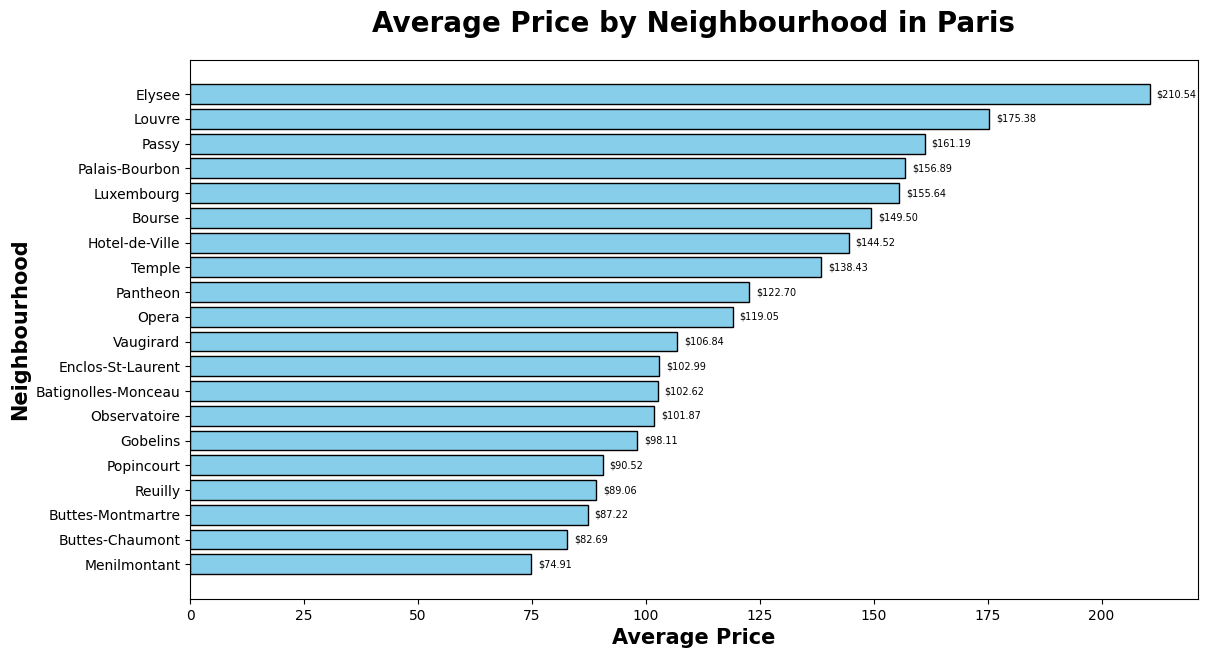

In [39]:
plt.figure(figsize=(13, 7))
bars = plt.barh("neighbourhood", "price", data=paris_listings_neighbourhood, 
                color="skyblue", edgecolor="black")
plt.bar_label(bars, fmt="$%.2f", padding=5, fontsize=7, color="black")
plt.xlabel("Average Price", fontsize=15, color="black", fontweight="bold")
plt.ylabel("Neighbourhood", fontsize=15, color="black", fontweight="bold")
plt.title("Average Price by Neighbourhood in Paris", fontsize=20, color="black", 
          fontweight="bold", loc="center", pad=20)

plt.show()


* High Listing Neighborhoods Due to Low Pricing

Buttes, Popincourt, and Vaugirard have the highest number of Airbnb listings. The lower booking prices in these areas make them attractive to budget-conscious travelers, leading to a higher supply of listings.
Luxury & Tourist-Centric Areas Have Fewer Listings but Higher Prices

Elysée and Louvre have significantly fewer listings compared to other neighborhoods. However, their prices are much higher, likely due to:
High demand from tourists wanting premium locations.
Proximity to major landmarks like the Champs-Élysées, the Louvre Museum, and other cultural hotspots.
Luxury accommodations, which target a niche audience rather than mass bookings.
The Paris Airbnb market appears to have two main segments:
Affordable, high-competition areas (e.g., Buttes, Popincourt, Vaugirard)
Luxury, low-competition areas (e.g., Elysée, Louvre)
Hosts in high-listing areas might focus on competitive pricing and high occupancy rates, while those in premium locations may cater to exclusive, high-paying guests.


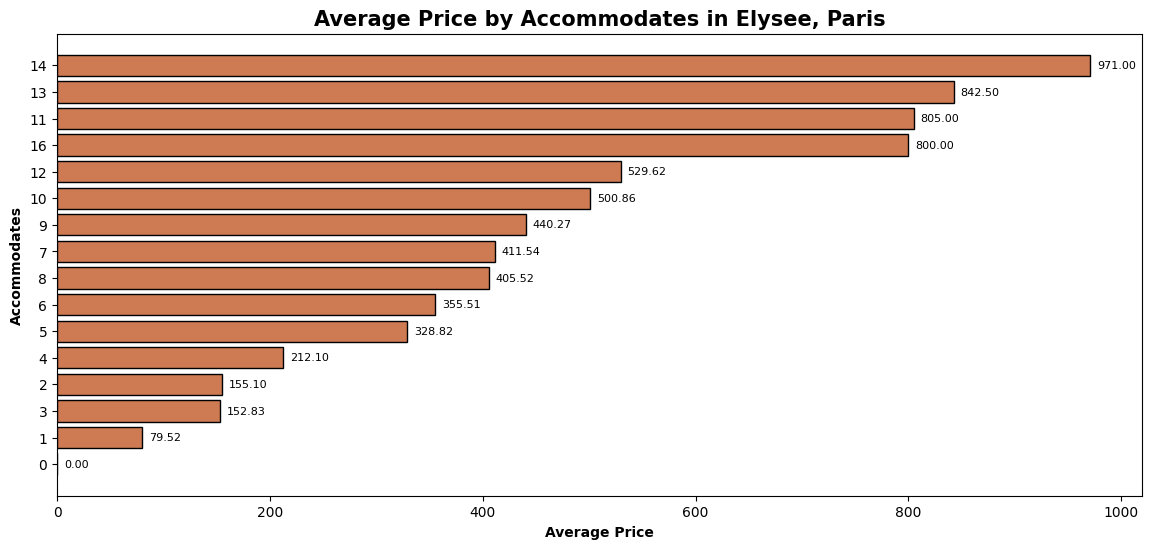

In [40]:
fig, ax = plt.subplots(figsize=(14,6))
b = ax.barh(paris_listings_accomodations["accommodates"].astype(str), 
            paris_listings_accomodations["price"], 
            color="#ce7b53", edgecolor="black")
ax.bar_label(b, fmt="%.2f", padding=5, fontsize=8, color="black")
ax.set_xlabel("Average Price", fontsize=10, color="black", fontweight="bold")
ax.set_ylabel("Accommodates", fontsize=10, color="black", fontweight="bold")
ax.set_title("Average Price by Accommodates in Elysee, Paris", 
             fontsize=15, color="black", fontweight="bold", loc="center")
plt.show()


In [21]:
p_listings = df[df["neighbourhood"]=="Elysee"]
elysee_listings_over_time = p_listings.groupby("year").agg(avg_price=("price","mean"),count=("price","count")).reset_index()

In [22]:
print(elysee_listings_over_time)

    year   avg_price  count
0   2009  165.000000      4
1   2010  209.437500     16
2   2011  493.423077     26
3   2012  157.420455     88
4   2013  178.077922    154
5   2014  159.276596    235
6   2015  173.184300    293
7   2016  253.064748    278
8   2017  216.434426    122
9   2018  300.288344    163
10  2019  220.673554    242
11  2020  184.034483    145
12  2021   73.500000      2


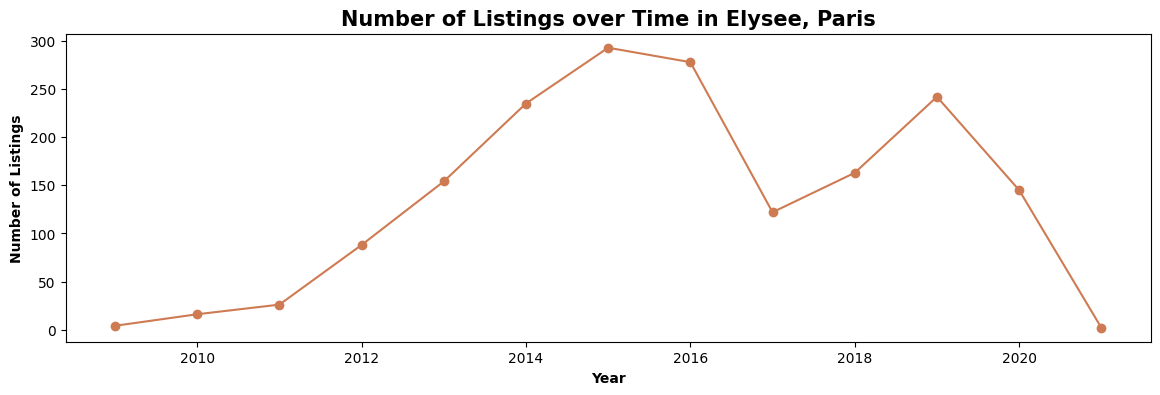

In [41]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(elysee_listings_over_time["year"], elysee_listings_over_time["count"], 
        marker="o", color="#ce7b53")
ax.set_xlabel("Year", fontsize=10, color="black", fontweight="bold")
ax.set_ylabel("Number of Listings", fontsize=10, color="black", fontweight="bold")
ax.set_title("Number of Listings over Time in Elysee, Paris", 
             fontsize=15, color="black", fontweight="bold", loc="center")
plt.show()

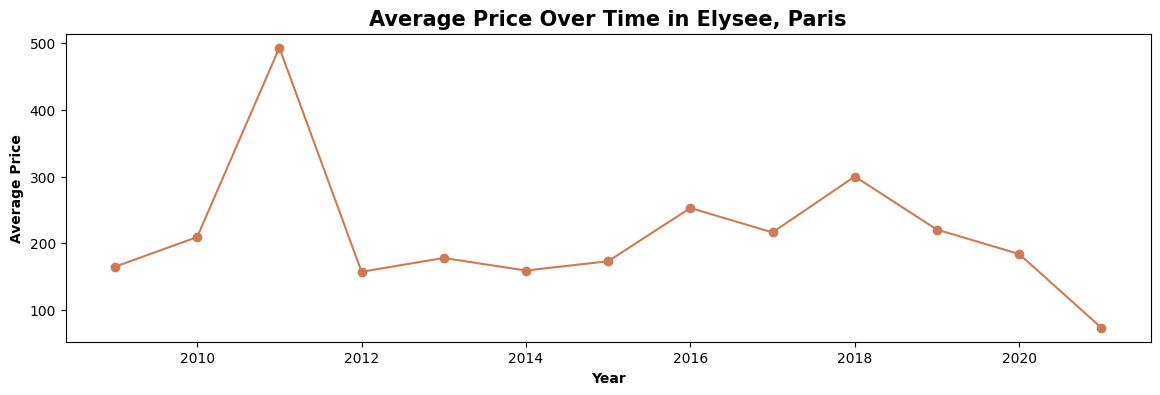

In [42]:
fig, ax = plt.subplots(figsize=(14,4))
x=ax.plot(elysee_listings_over_time["year"], elysee_listings_over_time["avg_price"], 
        marker="o", color="#ce7b53")
ax.set_xlabel("Year", fontsize=10, color="black", fontweight="bold")
ax.set_ylabel("Average Price", fontsize=10, color="black", fontweight="bold")
ax.set_title("Average Price Over Time in Elysee, Paris", 
             fontsize=15, color="black", fontweight="bold", loc="center")
plt.show()

# Overall price and listings

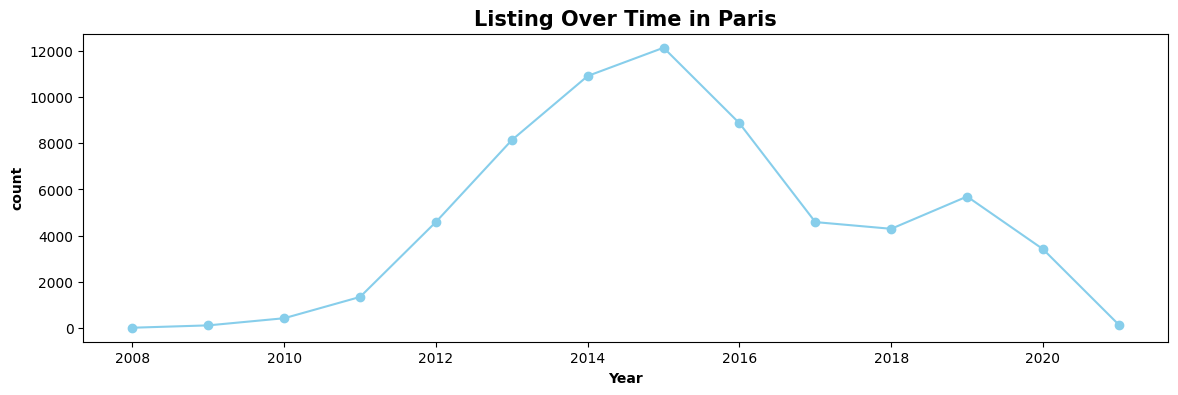

In [46]:
plt.figure(figsize=(14,4))
plt.plot(paris_listings_over_time["year"],paris_listings_over_time["count"],color="skyblue",marker="o",)
plt.xlabel("Year",fontsize=10,color="black",fontweight="bold")
plt.ylabel("count",fontsize=10,color="black",fontweight="bold")
plt.title("Listing Over Time in Paris",fontsize=15,color="black",fontweight="bold",loc="center")
plt.show()

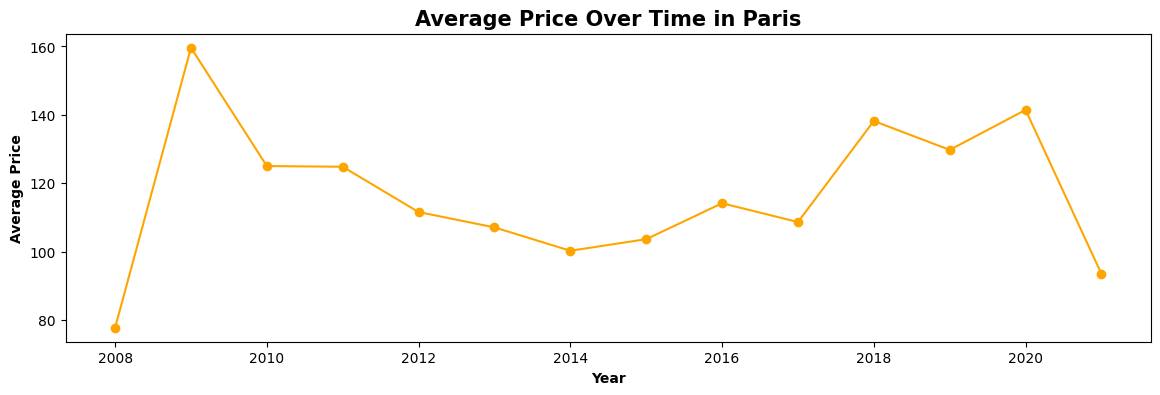

In [47]:
plt.figure(figsize=(14,4))
plt.plot(paris_listings_over_time["year"], paris_listings_over_time["avg_price"],color="orange",marker="o")
plt.xlabel("Year",fontsize=10,color="black",fontweight="bold")
plt.ylabel("Average Price",fontsize=10,color="black",fontweight="bold")
plt.title("Average Price Over Time in Paris",fontsize=15,color="black",fontweight="bold",loc="center")
plt.show()

# Overall Decline in Listings:
The number of Airbnb listings in Paris has steadily decreased over time, likely driven by rising booking prices.

A broader view of the trend reveals that from 2011 to 2015, listings were on an upward trajectory as booking prices declined, making Airbnb a more attractive option for travelers.
Since 2015, booking prices have remained consistently high, leading to a sharp decline in listings.
The introduction of regulations in 2015 further accelerated this decline, restricting short-term rentals and reducing the number of active hosts.
This pattern highlights a shift in the Paris Airbnb market, where affordability initially fueled growth, but sustained high prices and regulatory constraints have since led to a contraction in listings.

In [27]:
data.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [28]:
df2=required_data[
    ["host_since",
    "neighbourhood",
    "price",
    "city",
    "accommodates",
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",
    "instant_bookable"]
    ].reset_index(drop=True)

In [29]:
df2

,host_since,neighbourhood,price,city,accommodates,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,12/3/2011,Buttes-Montmartre,53,Paris,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,11/29/2013,Buttes-Montmartre,120,Paris,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,7/31/2014,Elysee,89,Paris,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,12/17/2013,Vaugirard,58,Paris,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,12/14/2014,Passy,60,Paris,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64685,4/13/2015,Observatoire,120,Paris,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
64686,11/27/2013,Buttes-Montmartre,60,Paris,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
64687,4/27/2012,Buttes-Montmartre,50,Paris,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
64688,7/16/2015,Popincourt,105,Paris,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [30]:
df2["review_scores_accuracy"].value_counts()

review_scores_accuracy
10.0    34203
9.0     10665
8.0      2058
7.0       429
6.0       349
2.0       150
4.0        79
5.0        51
3.0         5
Name: count, dtype: int64

In [31]:
df2.dropna(inplace=True)

In [32]:
df2.describe()

,price,accommodates,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,47918.000000,47918.000000,47918.000000,47918.000000,47918.000000,47918.000000,47918.000000,47918.000000,47918.000000
mean,107.362619,3.050023,93.077403,9.595663,9.207187,9.687800,9.714345,9.685901,9.277224
std,195.287845,1.594117,8.891689,0.844716,1.104785,0.772023,0.761962,0.700450,0.941463
min,8.000000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,58.000000,2.000000,90.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000
50%,80.000000,2.000000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000
75%,115.000000,4.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,12000.000000,16.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [33]:
df2["host_since"]=pd.to_datetime(df2["host_since"])

In [34]:
df2["year"]=df2["host_since"].dt.year

In [57]:
x=df2.groupby("year").agg(avg_accuracy=("review_scores_accuracy","mean"),avg_review_rating=("review_scores_rating","mean"),avg_cleanliness=("review_scores_cleanliness","mean"),
                        avg_review_score_value=("review_scores_value","mean")).reset_index()

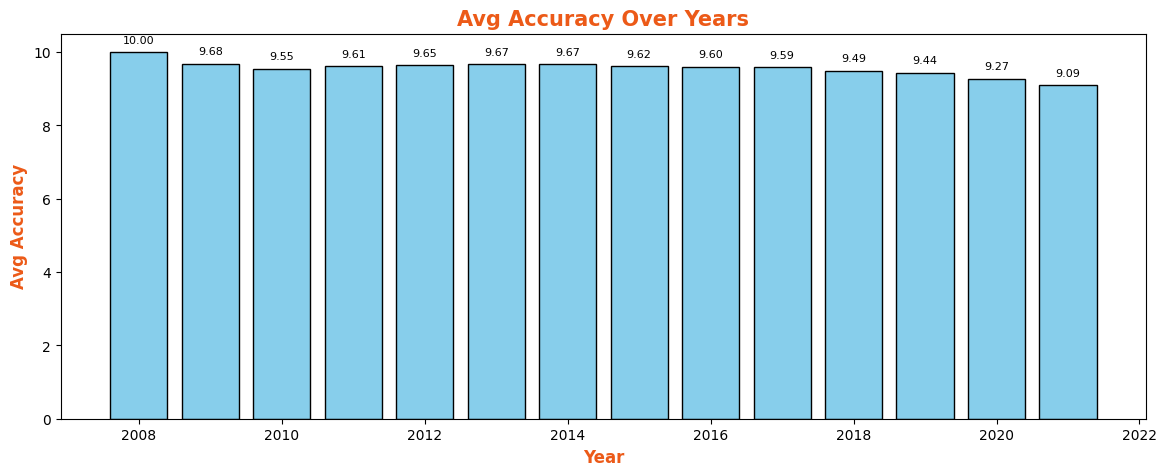

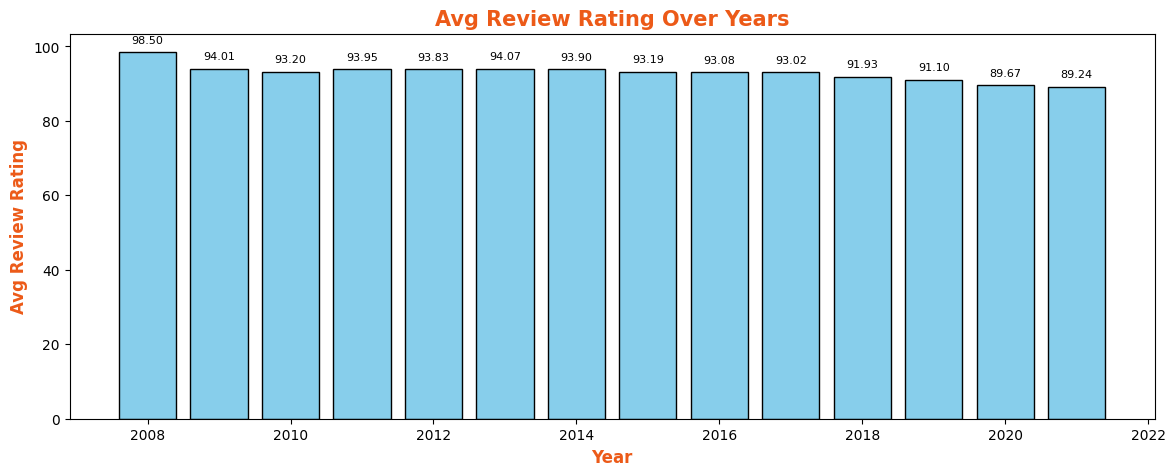

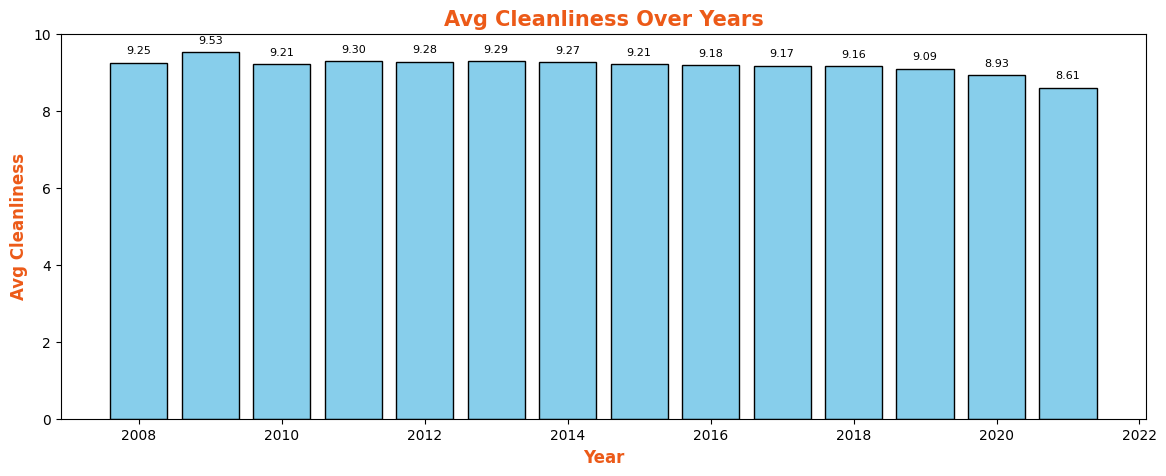

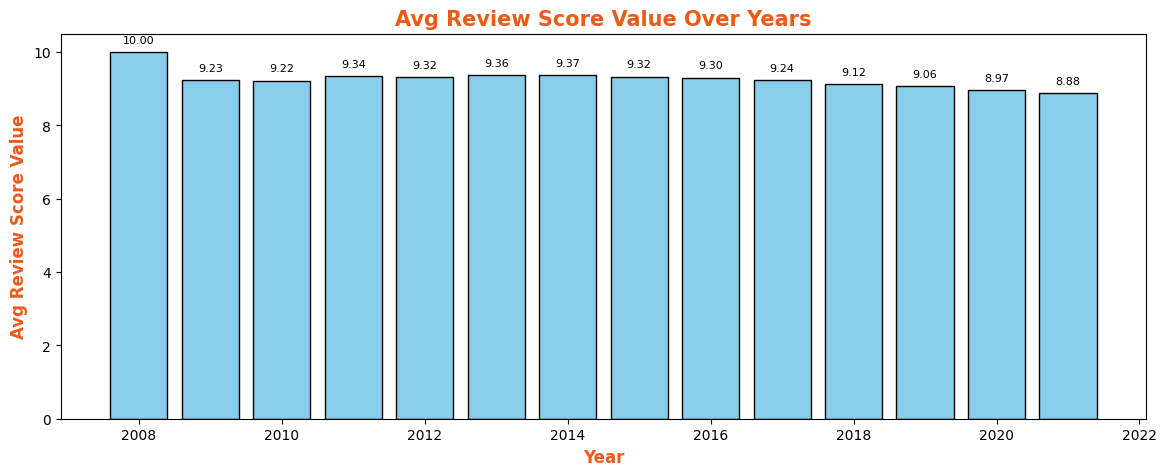

In [59]:

columns = ["avg_accuracy", "avg_review_rating", "avg_cleanliness", "avg_review_score_value"]

for col in columns:
    plt.figure(figsize=(14, 5))
    bars = plt.bar(x["year"], x[col], color="skyblue", edgecolor="black", linewidth=1)
    plt.bar_label(bars, fmt="%.2f", padding=5, fontsize=8, color="black")
    plt.xlabel("Year", fontsize=12, color="#ec5a18", fontweight="bold")
    plt.ylabel(col.replace("_", " ").title(), fontsize=12, color="#ec5a18", fontweight="bold")
    plt.title(f"{col.replace('_', ' ').title()} Over Years", fontsize=15, color="#ec5a18", fontweight="bold")
    plt.show()

# Changes in Airbnb Reviews Since 2015:
Since 2015, Airbnb reviews in Paris have undergone notable shifts due to rising prices, stricter regulations, and evolving guest expectations.
* Key Changes in Review Metrics:
Accuracy Ratings – Became more volatile, as hosts adjusted listings to comply with new rental laws.
Cleanliness Ratings – Declined slightly, possibly due to reduced competition and increased comparisons with hotels.
Overall Ratings – More critical as guests expected higher standards due to increased booking prices.
Review Sentiment – Shifted from mostly positive before 2015 to a more balanced mix of praise and critique.

# Brief Insight:
The 2015 regulations and rising prices transformed Airbnb in Paris from a budget-friendly alternative to a more premium, hotel-like experience. This shift led to stricter guest reviews, fluctuating accuracy scores, lower cleanliness ratings, and overall higher expectations from travelers.
